In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

#### Code 10.1

In [3]:
d = {
    "A": [0, 0, 10, 0, 0],
    "B": [0, 1, 8, 1, 0],
    "C": [0, 2, 6, 2, 0],
    "D": [1, 2, 4, 2, 1],
    "E": [2, 2, 2, 2, 2],
}
p = pd.DataFrame(data=d)

#### Code 10.2

In [4]:
p_norm = p / p.sum(0)

#### Code 10.3

In [5]:
def entropy(x):
    y = [0 if i == 0 else i * np.log(i) for i in x]
    return -sum(y)


H = p_norm.apply(entropy, axis=0)
H

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64

#### Code 10.4

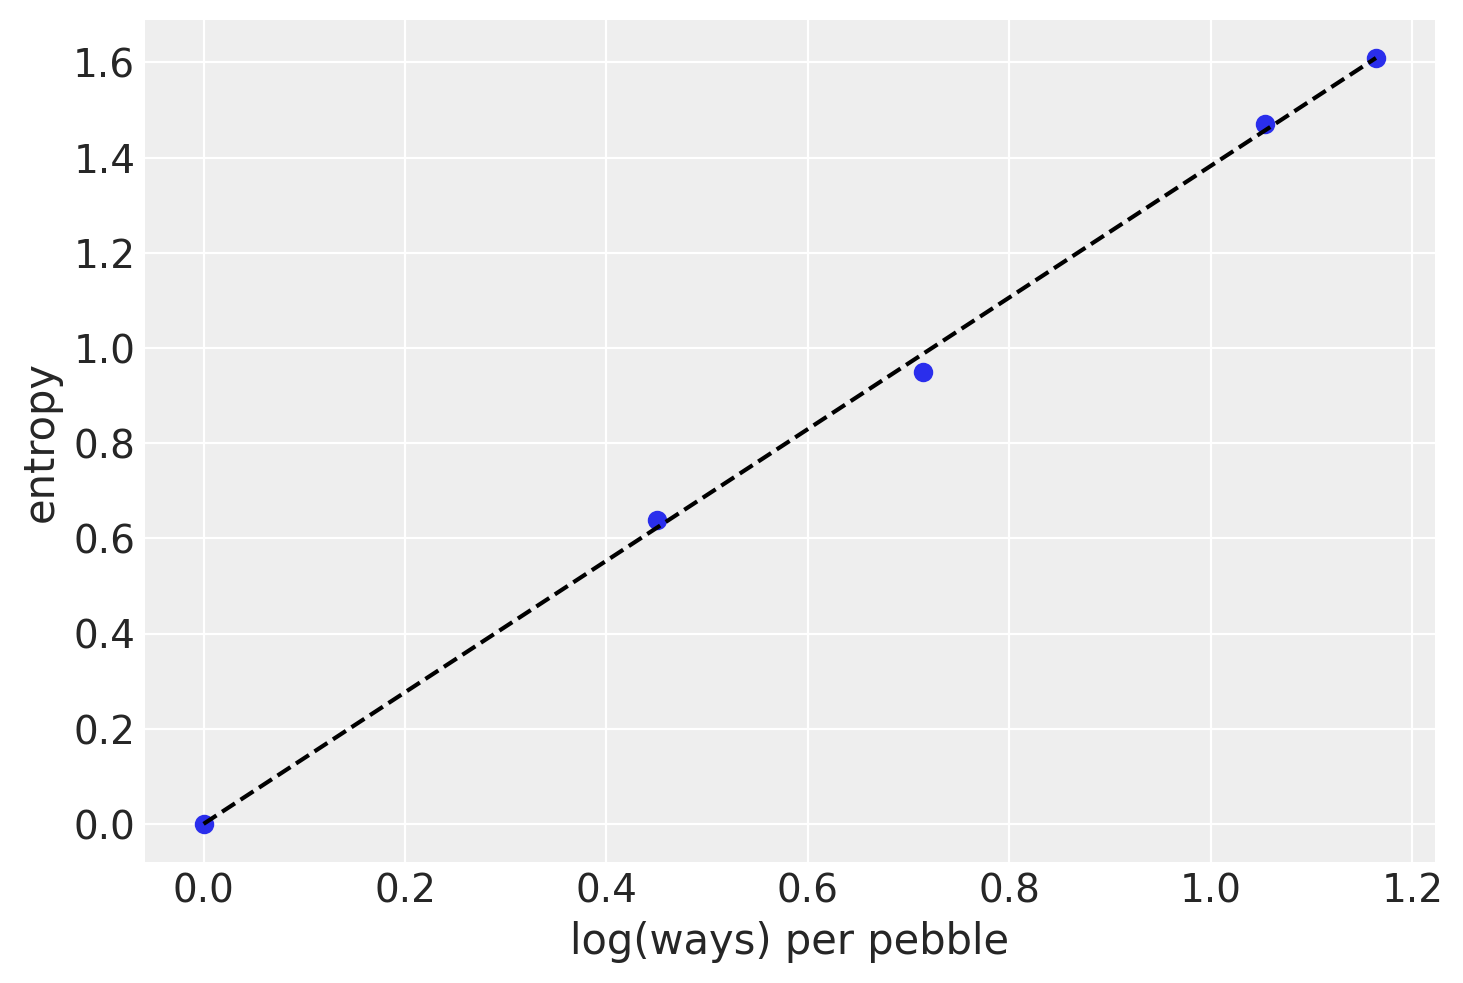

In [6]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = np.log(ways) / 10
plt.plot(logwayspp, H, "o")
plt.plot([0.0, max(logwayspp)], [0.0, max(H)], "--k")
plt.ylabel("entropy")
plt.xlabel("log(ways) per pebble");

#### Code 10.5

In [7]:
# Build list of the candidate distributions.
p = [
    [1 / 4, 1 / 4, 1 / 4, 1 / 4],
    [2 / 6, 1 / 6, 1 / 6, 2 / 6],
    [1 / 6, 2 / 6, 2 / 6, 1 / 6],
    [1 / 8, 4 / 8, 2 / 8, 1 / 8],
]

# Compute expected value of each. The sum of the multiplied entries is just a dot product.
p_ev = [np.dot(i, [0, 1, 1, 2]) for i in p]
p_ev

[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]

#### Code 10.6

In [8]:
# Compute the entropy of each distribution
p_ent = [entropy(i) for i in p]
p_ent

[np.float64(1.3862943611198906),
 np.float64(1.3296613488547582),
 np.float64(1.3296613488547582),
 np.float64(1.2130075659799042)]

#### Code 10.7

In [9]:
p = 0.7
A = [(1 - p) ** 2, p * (1 - p), (1 - p) * p, p**2]
A

[0.09000000000000002,
 0.21000000000000002,
 0.21000000000000002,
 0.48999999999999994]

#### Code 10.8

In [10]:
-np.sum(A * np.log(A))

np.float64(1.221728604109787)

#### Code 10.9

In [11]:
def sim_p(G=1.4):
    x123 = np.random.uniform(size=3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2]) / (2 - G)
    x1234 = np.concatenate((x123, [x4]))
    z = np.sum(x1234)
    p = x1234 / z
    return -np.sum(p * np.log(p)), p

#### Code 10.10

In [12]:
H = np.zeros(10**5)
p = np.zeros((10**5, 4))
for rep in range(10**5):
    h, p_ = sim_p()
    H[rep] = h
    p[rep] = p_

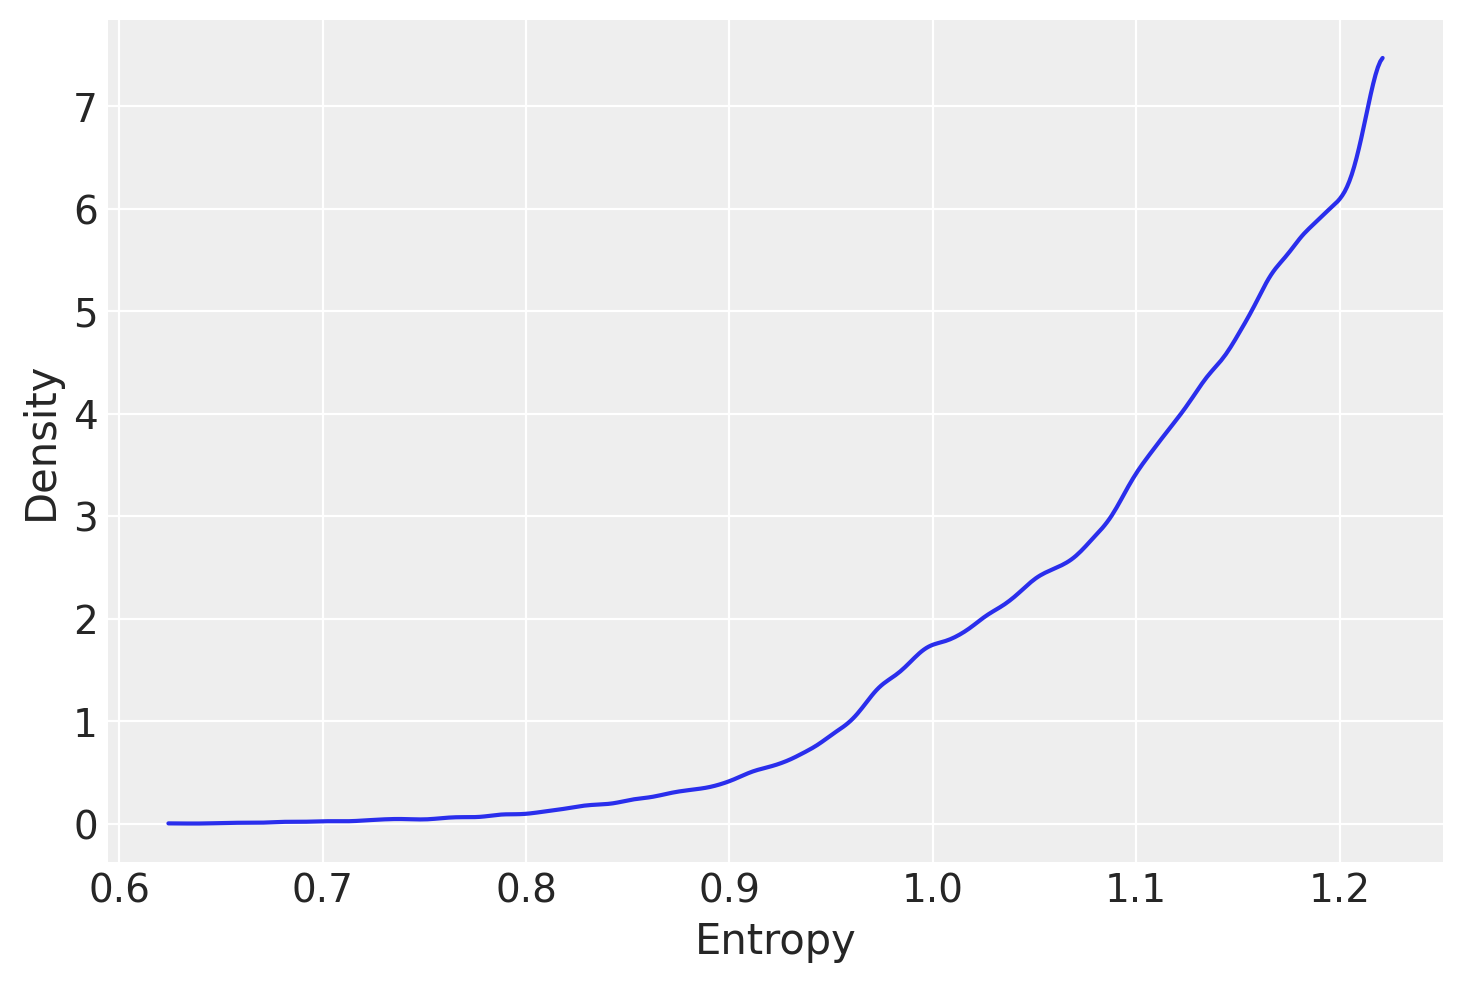

In [13]:
az.plot_kde(H)
plt.xlabel("Entropy")
plt.ylabel("Density");

#### Code 10.12

In [14]:
np.max(H)

np.float64(1.2217283913088997)

#### Code 10.13

In [15]:
p[np.argmax(H)]

array([0.08986327, 0.21014963, 0.21012384, 0.48986327])

## Just some stuff for distributions

#### exponential distribution

probability distribution that arises naturally when modeling waiting times or time until an event occurs. The exponential distribution is a continuous probability distribution that models the time between independent events that happen at a constant average rate. The PDF (Probability Density Function) of the exponential distribution describes how likely different waiting times are, relative to each other. Let’s say:

f(2) = exp_pdf(2, lamb=0.5) ≈ 0.1839

This does not mean:

“The probability of waiting exactly 2 units is 18.39%.”

Because in continuous distributions, the probability of any exact value is 0.

Instead, it means:

“Around x=2, the likelihood is 0.1839, and this area under the curve (say from 1.9 to 2.1) gives the probability for that small interval.”

In [38]:
#exponential
def exp_pdf(x, lamb=0.2):
    """x - The time or distance until the event happens. This is your random variable.
    lamb - The rate parameter, which controls how quickly events happen. It is the average number of events per unit time.
    """
    return lamb*np.e**(-lamb*x) #same as lamb/(np.e**(lamb*x))

In [45]:
lamb=5.0
x=4
lamb*np.e**(-lamb*x)

1.03057681121928e-08

In [46]:
lamb/(np.e**(lamb*x))

1.0305768112192801e-08

Text(0.5, 0, 'x')

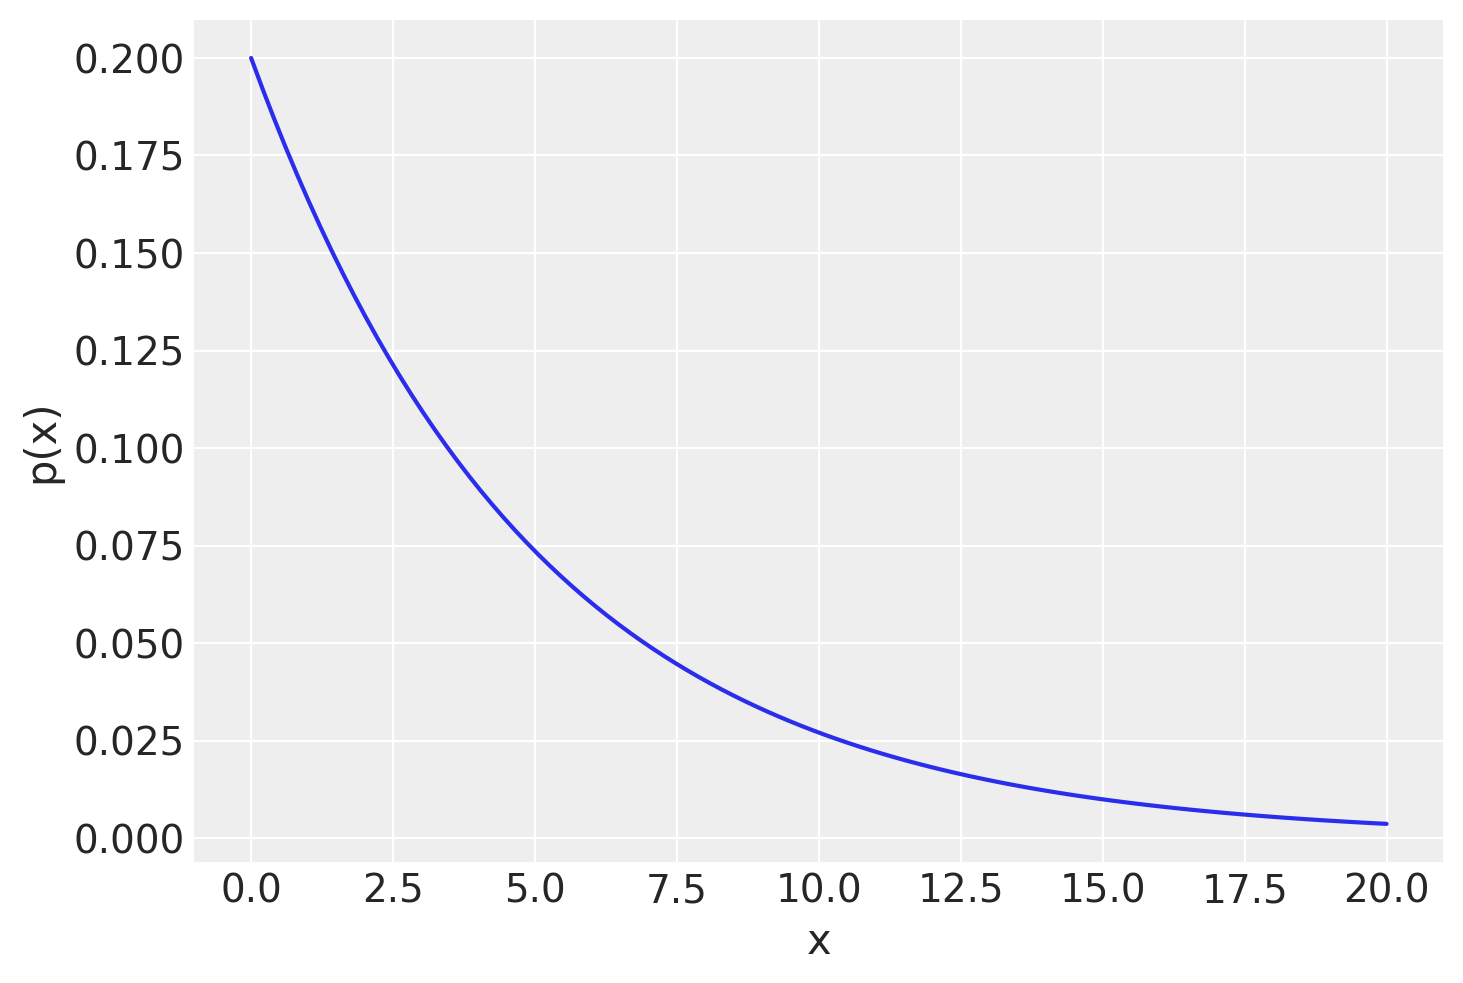

In [47]:
x=np.linspace(0,20, 100)
y=exp_pdf(x)

plt.plot(x, y)
plt.ylabel('p(x)')
plt.xlabel('x')

#### Gamma distribution

The exponential distribution is a special case of the gamma distribution
— specifically, the case where the shape parameter 𝛼 = 1.

 - Exponential distribution:
Models time until the first event in a Poisson process.


 - Gamma distribution:
Models time until the α-th event in a Poisson process.

More general — allows modeling of waiting for multiple events.

The **gamma distribution** is defined as:

$$
f(x; \alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}, \quad \text{for } x > 0
$$

Where:
- \( \alpha \) = shape parameter (sometimes written as \( k \)),  Intuition: If you're modeling time until the α-th event in a Poisson process, α is how many events you're waiting for.
- \( \beta \) = rate parameter (sometimes written as \( \lambda \))
- \( \Gamma(\alpha) \) is the gamma function, generalizing factorials

**Mean**:
$$
\mathbb{E}[x] = \frac{\alpha}{\beta}
$$

**Variance**:
$$
\text{Var}(x) = \frac{\alpha}{\beta^2}
$$

---

### 🔁 Exponential as a Special Case

Set \( \alpha = 1 \), then:

$$
f(x; 1, \beta) = \frac{\beta^1}{\Gamma(1)} x^{1 - 1} e^{-\beta x} = \beta e^{-\beta x}
$$

Which is exactly the **exponential distribution**:

$$
f(x; \lambda) = \lambda e^{-\lambda x}
$$

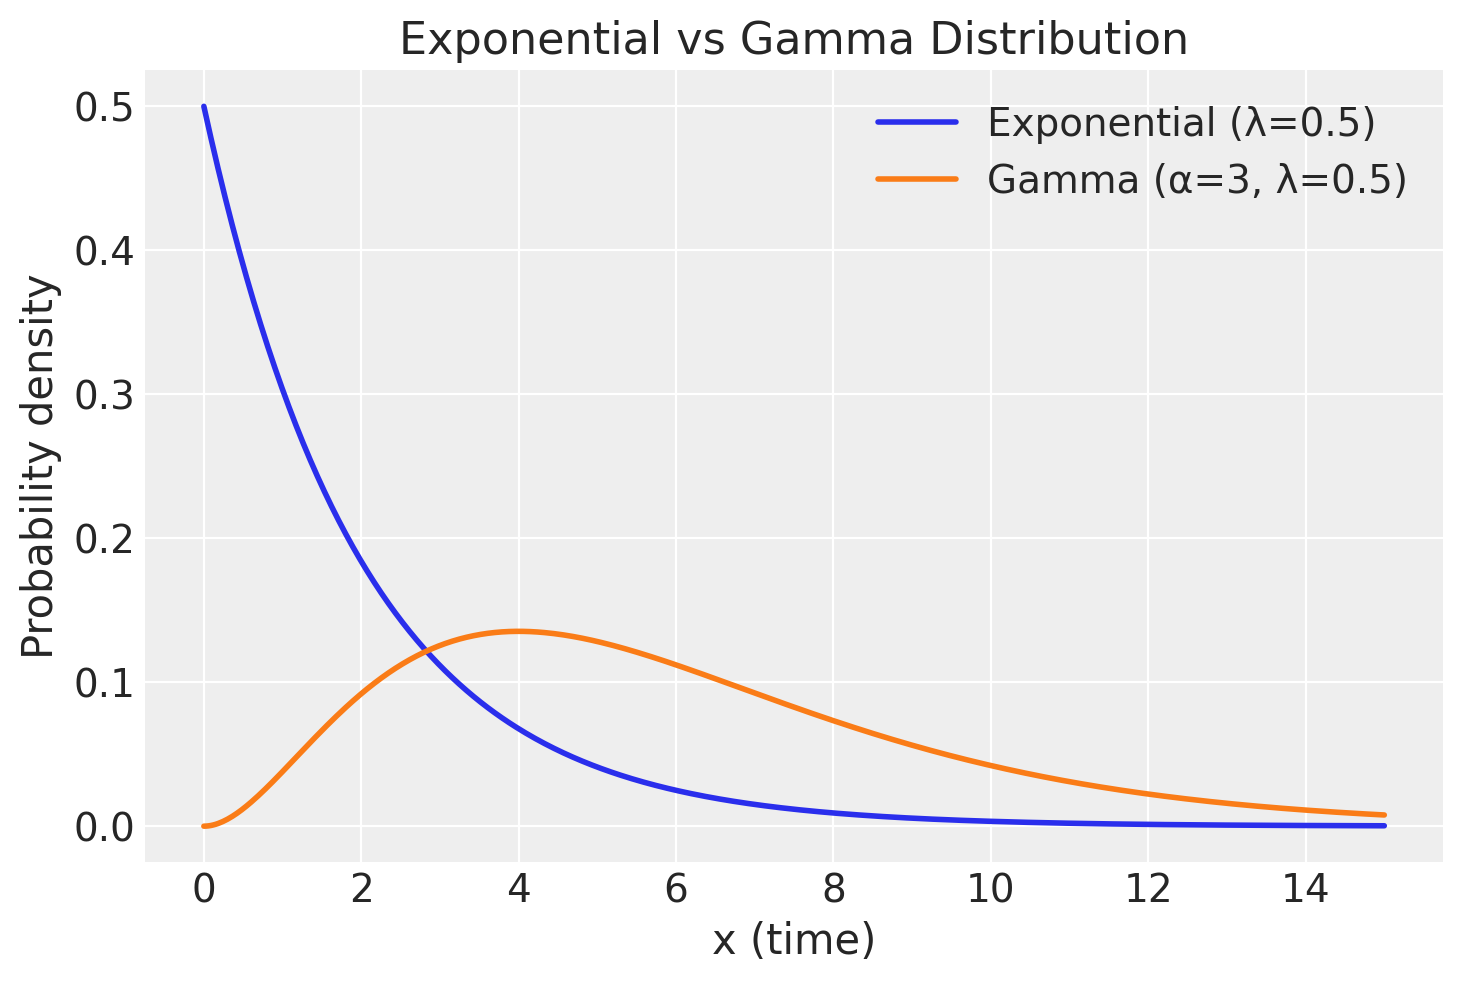

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon

x = np.linspace(0, 15, 500)

# Exponential: special case of gamma with shape=1
pdf_exp = expon.pdf(x, scale=1/0.5)  # λ = 0.5 → scale = 1/λ
pdf_gamma = gamma.pdf(x, a=3, scale=1/0.5)  # shape=3, same λ

plt.plot(x, pdf_exp, label='Exponential (λ=0.5)', lw=2)
plt.plot(x, pdf_gamma, label='Gamma (α=3, λ=0.5)', lw=2)
plt.title('Exponential vs Gamma Distribution')
plt.xlabel('x (time)')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

### 🔗 Relationship: Gamma as Sum of Exponentials

The **gamma distribution** models the **sum of multiple independent exponential waiting times**.

More precisely:

$$
X_1, X_2, \dots, X_k \sim \text{Exponential}(\lambda) \quad \text{(i.i.d.)}
$$

Then:

$$
\sum_{i=1}^{k} X_i \sim \text{Gamma}(\alpha = k, \beta = \lambda)
$$

---

### 📘 Interpretation:

- **Exponential** distribution models **time until the first event** in a Poisson process.
- **Gamma** distribution models **time until the \( k \)-th event** in the same Poisson process.

---

### 🧠 Why?

Each exponential random variable \( X_i \) represents the time between successive events.

So, adding \( k \) such variables gives the total time until the \( k \)-th event:

$$
\text{Gamma}(k, \lambda) = \sum_{i=1}^{k} \text{i.i.d. Exponential}(\lambda)
$$


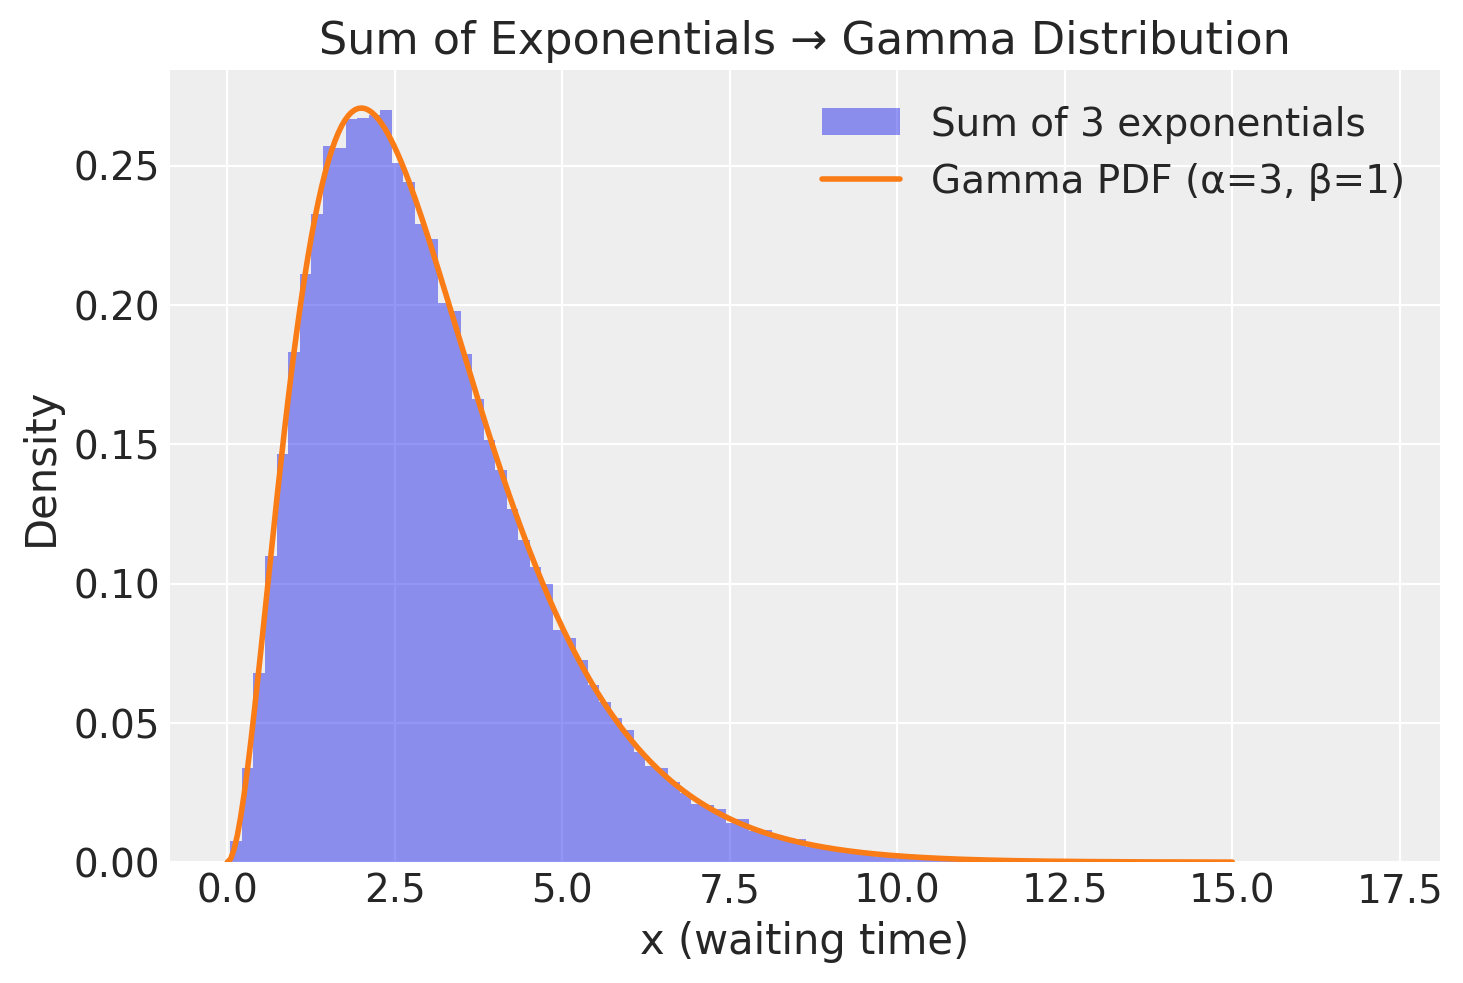

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon

λ = 1.0 #- rate how ofen event happens
k = 3  # number of events we simulate

# simulate waiting times between events and sum them to get k-th event total waiting time
samples = np.sum(np.random.exponential(1/λ, size=(100000, k)), axis=1)

# Gamma distribution with α = 3, β = 1
x = np.linspace(0, 15, 300)
pdf_gamma = gamma.pdf(x, a=k, scale=1/λ)

# Plot
plt.hist(samples, bins=100, density=True, alpha=0.5, label='Sum of 3 exponentials')
plt.plot(x, pdf_gamma, label='Gamma PDF (α=3, β=1)', lw=2)
plt.legend()
plt.xlabel("x (waiting time)")
plt.ylabel("Density")
plt.title("Sum of Exponentials → Gamma Distribution")
plt.grid(True)
plt.show()


Why Is Peak < Mean?
Because the gamma distribution is right-skewed (especially for small k):

There’s a longer tail to the right

A few longer wait times pull the mean rightward

But the most probable time is a bit earlier

In [55]:
#simple integer gamma pdf function
import math

def gamma_integer(n):
    """Gamma(n) = (n-1)! for positive integers n"""
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n must be a positive integer")
    return math.factorial(n - 1)

def gamma_pdf(x, a, b):
    """x must be integer in this example
    a -  
    b - rate"""
    return b**a/gamma_integer(a)*x**(a-1)*np.e**(-b*x)
    

In [50]:
gamma_integer(5)

24

In [51]:
gamma_pdf(1, a=2, b=2)

0.5413411329464508

#### Normal distribution

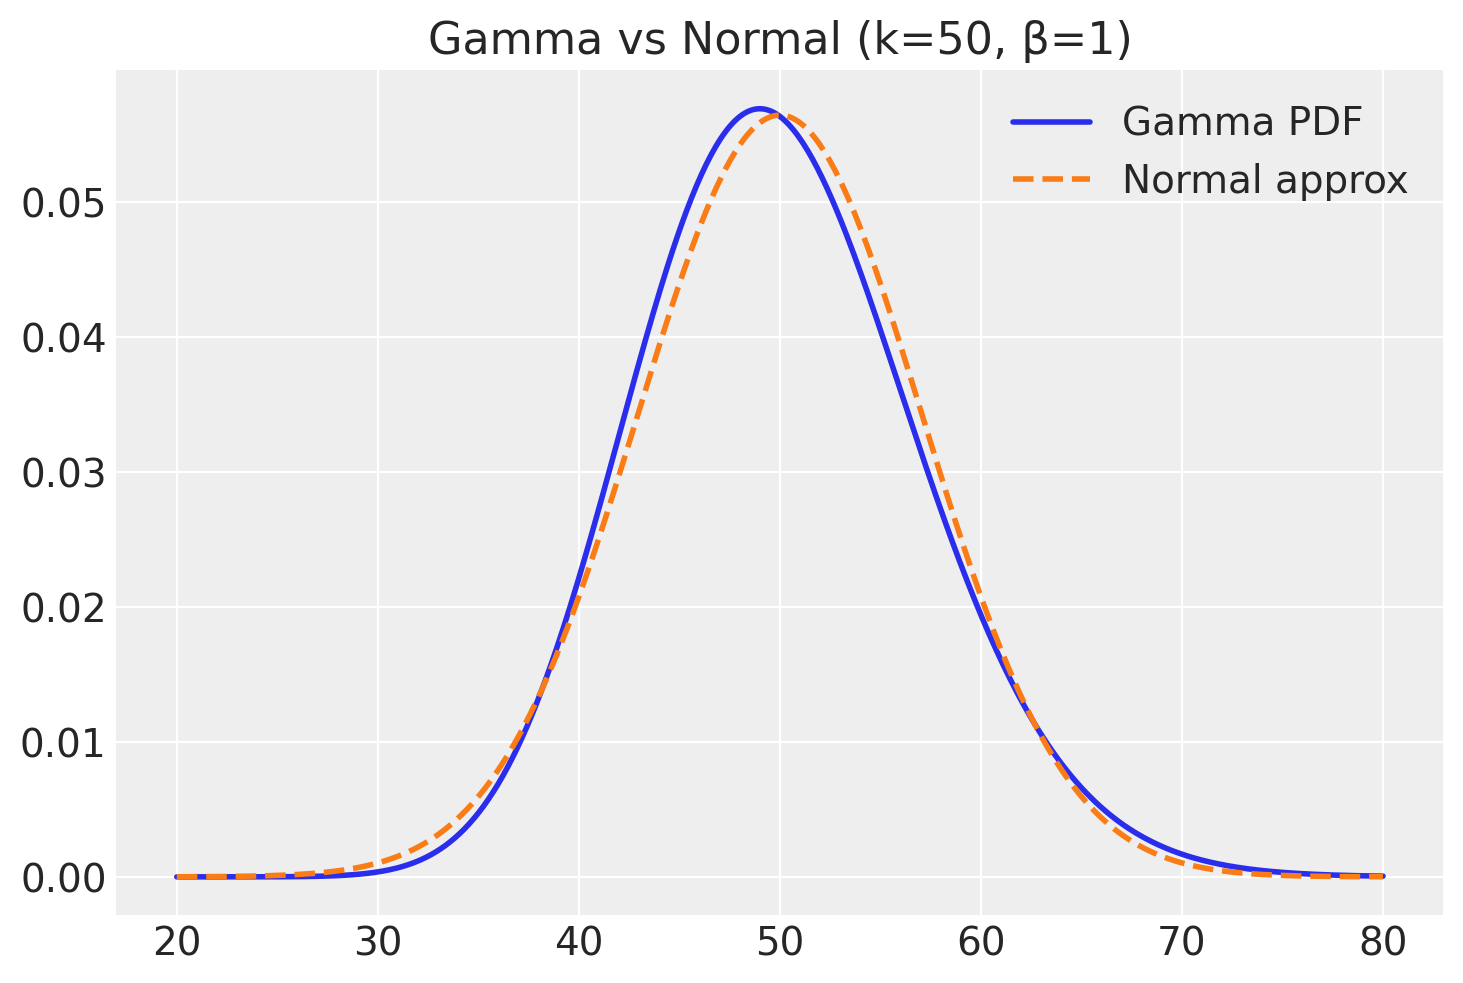

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

k = 50 #Shape parameter — how many events you're summing
beta = 1 # rate parameter β
mu = k / beta
sigma = np.sqrt(k) / beta

x = np.linspace(20, 80, 500)
pdf_gamma = gamma.pdf(x, a=k, scale=1/beta)
pdf_normal = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, pdf_gamma, label='Gamma PDF', lw=2)
plt.plot(x, pdf_normal, '--', label='Normal approx', lw=2)
plt.title("Gamma vs Normal (k=50, β=1)")
plt.legend()
plt.grid(True)
plt.show()


### 🔗 How Gamma Connects to Normal

#### ✅ 1. Central Limit Theorem (CLT)

The **sum of a large number of i.i.d. random variables** approaches a **normal distribution**, even if the individual variables are not normal.

So:

Gamma is defined as the sum of \( k \) exponential variables.

As \( k \to \infty \), the gamma distribution becomes approximately normal:

$$
\text{Gamma}(\alpha = k, \beta) \approx \text{Normal}\left(\mu = \frac{k}{\beta},\ \sigma^2 = \frac{k}{\beta^2} \right)
$$

#### 🔍 Why?

Because exponential variables are independent and have finite variance — so the Central Limit Theorem applies.

---

#### 📊 Visual Intuition

- Small \( k \) → gamma is skewed (long tail to the right)
- Large \( k \) → gamma becomes symmetric and bell-shaped → resembles normal

🔁 The higher \( k \), the more gamma "looks like" a normal distribution.


#### Poisson distribution

### 🔗 Exponential ⟷ Poisson: Two Sides of the Same Coin

They are **dual descriptions** of the same **Poisson process**:

| Distribution         | What it models                               |
|----------------------|-----------------------------------------------|
| \( \text{Poisson}(\lambda t) \) | Number of events in a time interval of length \( t \) |
| \( \text{Exponential}(\lambda) \) | Time between consecutive events             |

---

### 📘 The Poisson Process
A **Poisson process** assumes:

- Events happen **independently**
- At a constant average rate \( \lambda \)
- In continuous time

From this, you get:

- Number of events in time \( t \):  
  $$
  N(t) \sim \text{Poisson}(\lambda t)
  $$

- Time until the first event:  
  $$
  T \sim \text{Exponential}(\lambda)
  $$

- Time until the \( k \)-th event:  
  $$
  T_k \sim \text{Gamma}(k, \lambda)
  $$


---

### 🧠 Intuition

Let’s say you're modeling **bus arrivals**:

- If you fix a time interval (e.g., 10 minutes), the number of buses arriving is:

  $$
  N \sim \text{Poisson}(\lambda \cdot t)
  $$

- But if you wait at the stop, the **time until the next bus** is:

  $$
  T \sim \text{Exponential}(\lambda)
  $$

So:

- **Poisson** → counts in time  
- **Exponential** → time between counts

---

### 🧬 Mathematical Connection

#### 1. Time Until First Event (Exponential):

Let \( T \sim \text{Exponential}(\lambda) \). Then:

$$
P(T > t) = e^{-\lambda t}
$$

---

#### 2. Number of Events in Time \( t \) (Poisson):

Let \( N(t) \sim \text{Poisson}(\lambda t) \). Then:

$$
P(N(t) = 0) = e^{-\lambda t}
$$

---

This shows:

> The probability that **no events occur** in \( t \) units of time  
> is the same as the probability that the **first event happens after time \( t \)**.

That is:

$$
P(N(t) = 0) = P(T > t)
$$

→ The **Exponential** and **Poisson** distributions are directly tied together.


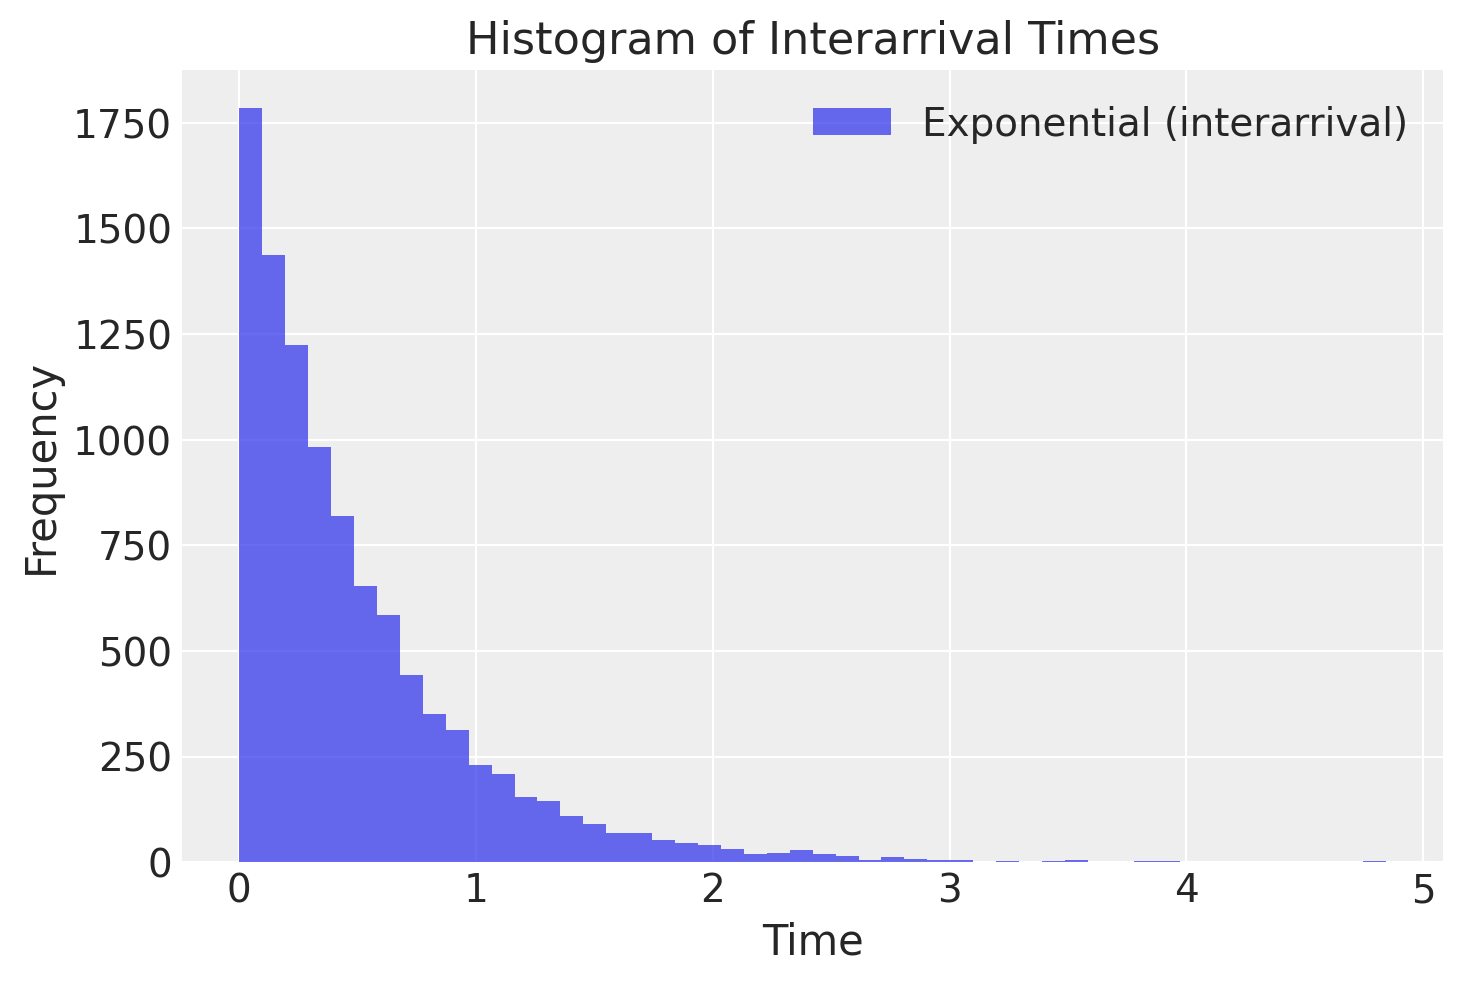

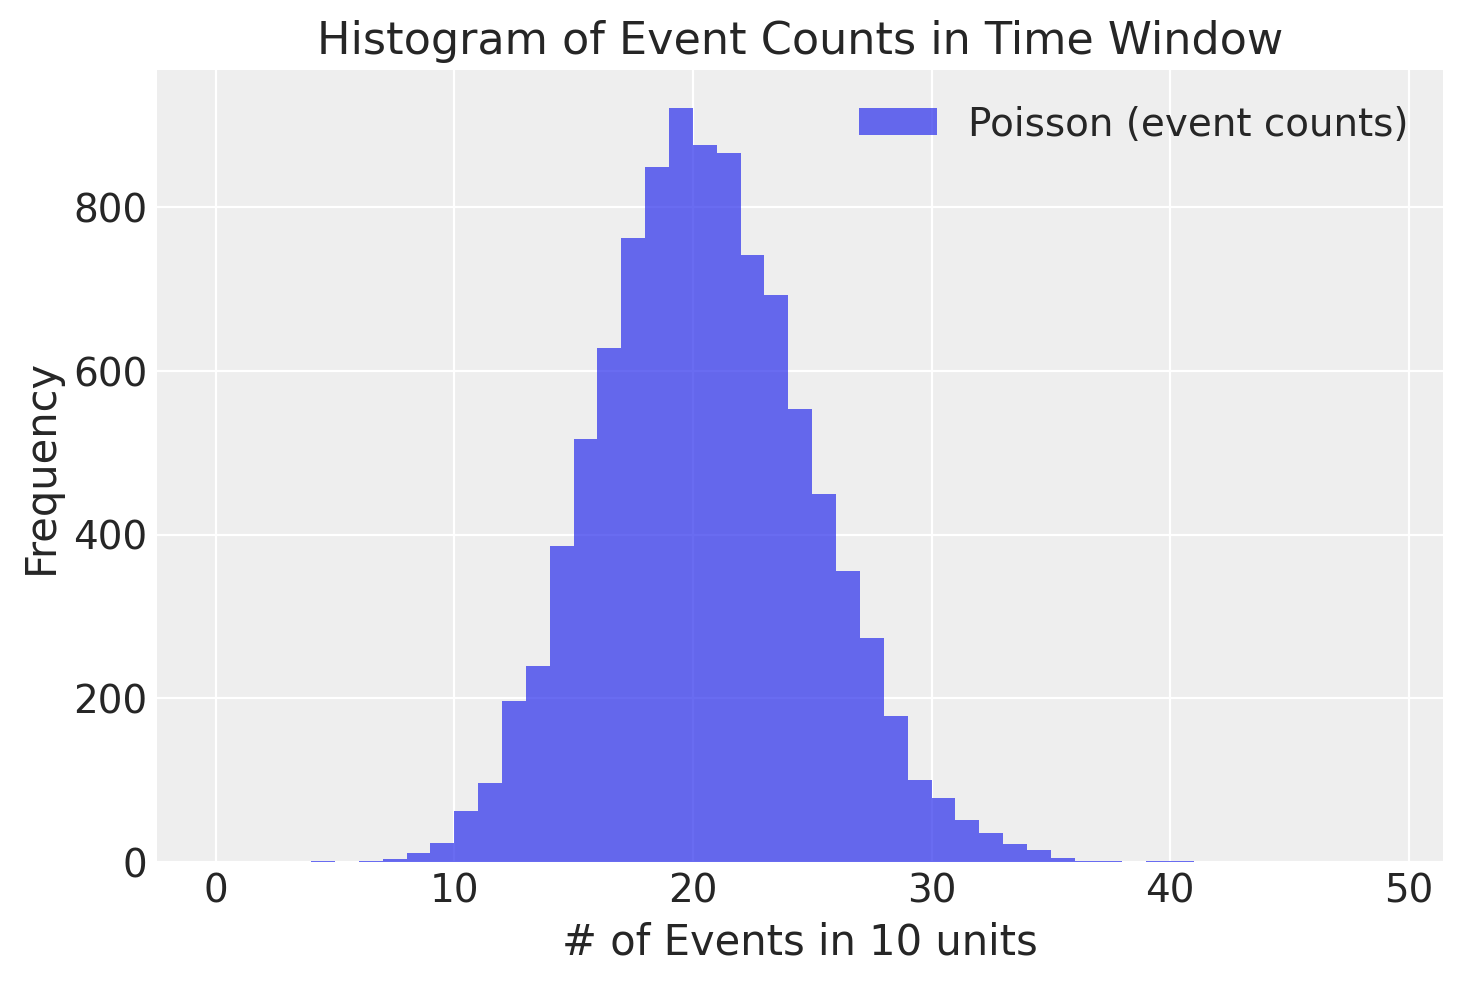

In [60]:
import numpy as np
import matplotlib.pyplot as plt

λ = 2  # events per unit time
T = np.random.exponential(1/λ, size=10000)  # inter-event times
N = np.random.poisson(λ * 10, size=10000)  # # of events in 10 units of time

plt.hist(T, bins=50, alpha=0.7, label='Exponential (interarrival)')
plt.title("Histogram of Interarrival Times")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

plt.hist(N, bins=range(50), alpha=0.7, label='Poisson (event counts)')
plt.title("Histogram of Event Counts in Time Window")
plt.xlabel("# of Events in 10 units")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


#### Binomial distribution

### 🔗 How Binomial, Poisson, and Exponential Distributions Are Connected

These distributions all describe **event-based randomness**, but from different perspectives:

| Distribution | What it models                                                   | Type       |
|--------------|-------------------------------------------------------------------|------------|
| **Binomial**     | Number of successes in a fixed number of trials (with prob. \( p \)) | Discrete |
| **Poisson**      | Number of events in a fixed time interval (at rate \( \lambda \))    | Discrete |
| **Exponential**  | Time between events in a Poisson process                          | Continuous |

---

### 🔁 Relationship Path

#### 🔹 Binomial \( \rightarrow \) Poisson (as a limit)

Let:

- Number of trials:  
  $$ n $$
- Probability of success:  
  $$ p $$
- Expected number of successes:  
  $$ \lambda = n p $$

Then, as:

-  
  $$ n \to \infty $$
-  
  $$ p \to 0 $$
- with  
  $$ \lambda = n p $$ fixed,

we have the approximation:

$$
\text{Binomial}(n, p) \longrightarrow \text{Poisson}(\lambda)
$$

This is valid when the number of trials is large, and each trial is rare.

---

#### 🔹 Poisson ↔ Exponential

From the **Poisson process**:

- The number of events in time \( t \):  
  $$ N(t) \sim \text{Poisson}(\lambda t) $$

- The time between events:  
  $$ T \sim \text{Exponential}(\lambda) $$

They are mathematically linked:

$$
P(T > t) = e^{-\lambda t} = P(N(t) = 0)
$$

So, the probability of **waiting longer than \( t \)** for the next event  
equals the probability of **no events in time \( t \)**.

---

### 🔄 Full Chain Summary:

$$
\text{Binomial}(n, p) \xrightarrow[n \to \infty,\ p \to 0]{np = \lambda} \text{Poisson}(\lambda) \leftrightarrow \text{Exponential}(\lambda)
$$

---

### 🧠 Example Use Case
Imagine you're modeling failures in a factory:

- **Binomial**: How many failures in 1000 items?  
  $$
  \text{Binomial}(n = 1000, p = 0.002) \approx \text{Poisson}(\lambda = 2)
  $$

- **Poisson**: How many failures in a day?  
  $$
  \text{Poisson}(2)
  $$

- **Exponential**: How long until the next failure?  
  $$
  \text{Exponential}(2)
  $$

Each one answers a different but related question.


C:\Users\risto\AppData\Local\Temp\ipykernel_29904\2177709156.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


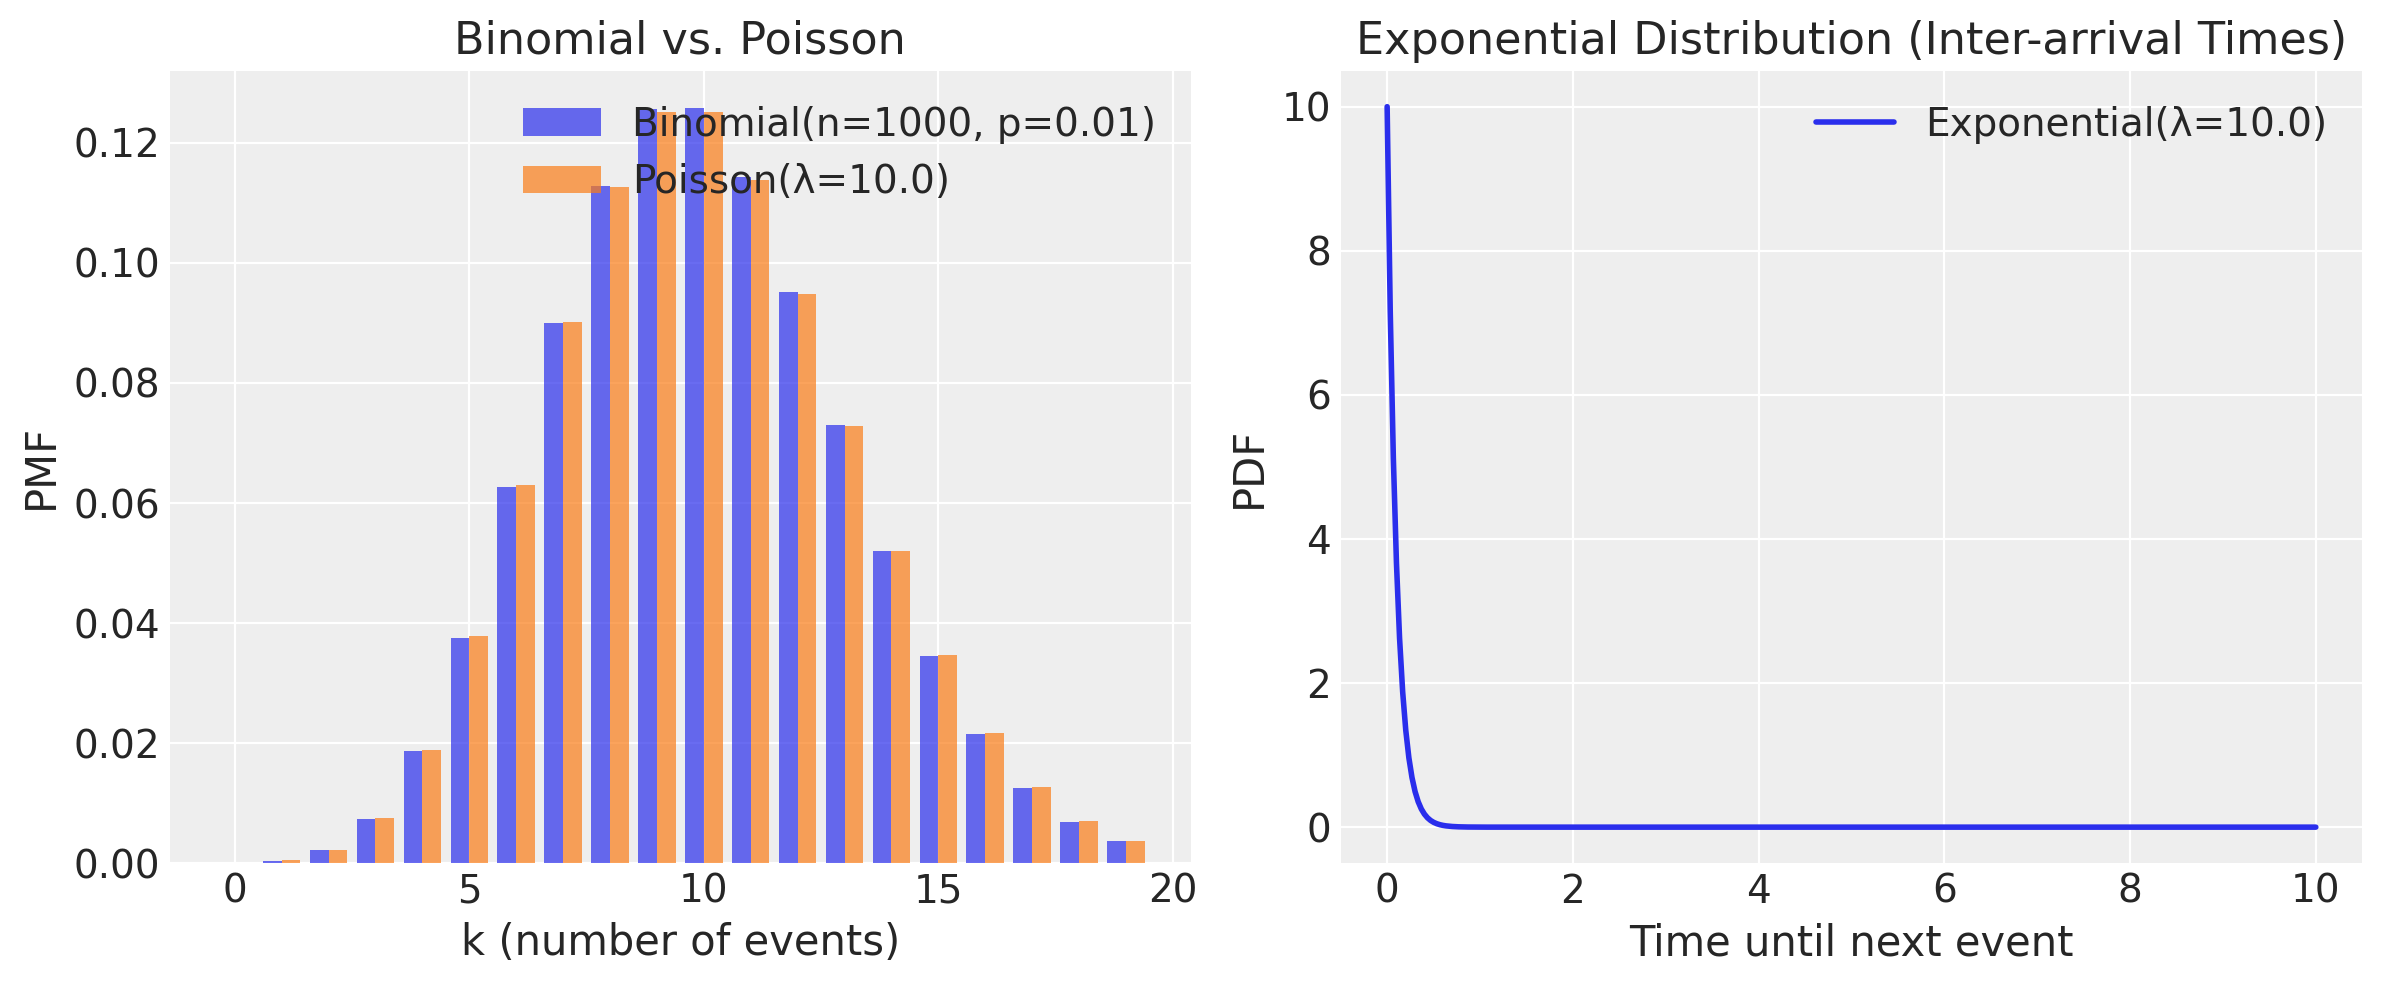

In [61]:
#how binomial distribution can become poisson (or could be approximate dfrom it)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, expon

# Parameters
n = 1000        # number of binomial trials
p = 0.01        # binomial success probability
λ = n * p       # Poisson rate

# --- Binomial vs. Poisson (discrete) ---

k_vals = np.arange(0, 20)
binom_pmf = binom.pmf(k_vals, n, p)
poisson_pmf = poisson.pmf(k_vals, λ)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(k_vals - 0.2, binom_pmf, width=0.4, label='Binomial(n=1000, p=0.01)', alpha=0.7)
plt.bar(k_vals + 0.2, poisson_pmf, width=0.4, label=f'Poisson(λ={λ})', alpha=0.7)
plt.title("Binomial vs. Poisson")
plt.xlabel("k (number of events)")
plt.ylabel("PMF")
plt.legend()
plt.grid(True)

# --- Poisson vs. Exponential (counts vs inter-arrival) ---

x_vals = np.linspace(0, 10, 300)
expon_pdf = expon.pdf(x_vals, scale=1/λ)

plt.subplot(1, 2, 2)
plt.plot(x_vals, expon_pdf, label=f'Exponential(λ={λ})', lw=2)
plt.title("Exponential Distribution (Inter-arrival Times)")
plt.xlabel("Time until next event")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Summary

### 📊 Summary of Common Distributions (Stable Render)

| Distribution | Type       | Domain            | Parameters                 | Use Case                                 | Mean         | Variance        |
|--------------|------------|-------------------|----------------------------|-------------------------------------------|--------------|-----------------|
| Exponential  | Continuous | $x \geq 0$        | $\lambda$ (rate)           | Time until 1st Poisson event              | $1/\lambda$  | $1/\lambda^2$   |
| Gamma        | Continuous | $x \geq 0$        | $\alpha$, $\beta$ (rate)   | Time until $\alpha$-th Poisson event      | $\alpha/\beta$ | $\alpha/\beta^2$ |
| Normal       | Continuous | $x \in \mathbb{R}$| $\mu$, $\sigma^2$          | Central Limit Theorem (sum of effects)    | $\mu$        | $\sigma^2$      |
| Poisson      | Discrete   | $k = 0, 1, 2, \dots$ | $\lambda$ (rate × time) | Count of events in fixed time             | $\lambda$    | $\lambda$       |
| Binomial     | Discrete   | $k = 0, \dots, n$ | $n$ (trials), $p$ (prob)   | Number of successes in $n$ trials         | $np$         | $np(1 - p)$     |


### 🔗 Connections Between Distributions

| From → To           | Condition / Explanation                                               |
|---------------------|-----------------------------------------------------------------------|
| Binomial → Poisson  | As $n \to \infty$, $p \to 0$, with $\lambda = np$ fixed              |
| Poisson ↔ Exponential | Dual views of the Poisson process: counts ↔ inter-arrival times      |
| Poisson → Gamma     | Sum of $k$ Exponential($\lambda$) variables → Gamma($k, \lambda$)    |
| Gamma → Normal      | As $k \to \infty$, Central Limit Theorem (CLT) applies               |
| Binomial → Normal   | As $n \to \infty$, via CLT (if $np$ and $n(1-p)$ are not too small)  |
| Poisson → Normal    | As $\lambda \to \infty$, via CLT                                     |
                             |


```markdown
Binomial(n, p)
   │
   ├── (n → ∞, p → 0, np = λ) → Poisson(λ)
   │                                  │
   │                                  ├── Time between events → Exponential(λ)
   │                                  └── Sum of k Exp(λ) → Gamma(k, λ)
   │                                                  │
   │                                                  └── (k → ∞) → Normal
   │
   └── (n → ∞, CLT) → Normal

Poisson(λ)
   └── (λ → ∞) → Normal

In [16]:
%load_ext watermark
%watermark -v -iv -w

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

numpy     : 1.22.4
matplotlib: 3.5.2
arviz     : 0.12.1
pandas    : 1.4.2

Watermark: 2.3.1

